In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [2]:
models = ['ref','idm1','idm2']

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'newtonian',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'tight_coupling_approximation':0,
                  'tight_coupling_trigger_tau_c_over_tau_h':0.012,
                  'tight_coupling_trigger_tau_c_over_tau_k':0.008,
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  'background_verbose':5,
                  'input_verbose':5,
                  'perturbations_verbose':5,
                  'h':0.67556,
                  'lensing':'yes'
                 })
    if M == 'idm1':
        cosmo[M].set({'a_bidm':5e-4,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'idm2':
        cosmo[M].set({'a_bidm':5e-2,
                      'f_bidm':0.99,
                      'A_bidm':1.9e-41,
                      'm_bidm':100.,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    print([M])
    cosmo[M].compute()


['ref']
['idm1']
['idm2']


In [3]:
recfast_triggers={'recfast_z_He_1':8050,'recfast_z_He_2':5100,'recfast_z_He_3':3550,'approx 5':2867,'full':1604, 'no approx':1165}

(10, 10000.0)

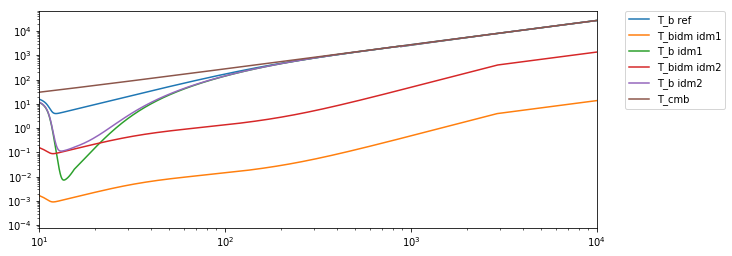

In [4]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        plt.loglog(Th['z'],Th['Tbidm [K]'],label='T_bidm '+M)
    plt.loglog(Th['z'],Th['Tb [K]'],label = 'T_b '+M)
plt.loglog(Th['z'],2.73*(Th['z']+1), label = 'T_cmb')

#for rct in recfast_triggers:
#    plt.axvline(x=recfast_triggers[rct],linestyle='--',label=rct)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(10,1e4)
#plt.ylim(1e2,1e4)


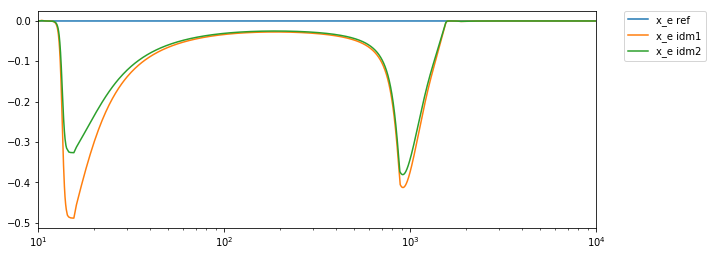

In [5]:
plt.figure(figsize = (10,4))
Th = cosmo['ref'].get_thermodynamics()
x_eref = interp1d(Th['z'],Th['x_e'])

for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    plt.semilogx(Th['z'],(Th['x_e']-x_eref(Th['z']))/x_eref(Th['z']),label='x_e '+M)
plt.xlim(10,1e4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

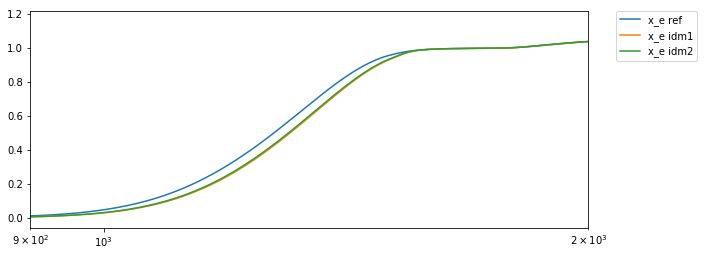

In [7]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    plt.semilogx(Th['z'],Th['x_e'],label='x_e '+M)
plt.xlim(9e2,2e3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

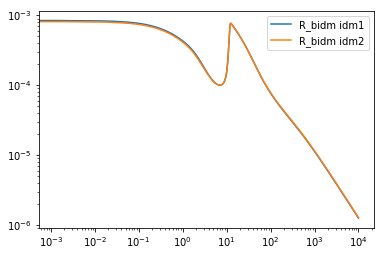

In [21]:
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(Th['z'],Th['Rbidm'],label='R_bidm '+M)

#plt.loglog(Th['z'],(Th['z']+1)**0.5,label='a^-0.5')
#plt.loglog(Th['z'],(Th['z']+1)**(-1),label='a')
#plt.loglog(Th['z'],(Th['z']+1)**(2),label='a^-2')
plt.legend()
#plt.loglog(Th['z'],(Th['z']+1)**(-1)+(Th['z']+1)**0.5)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


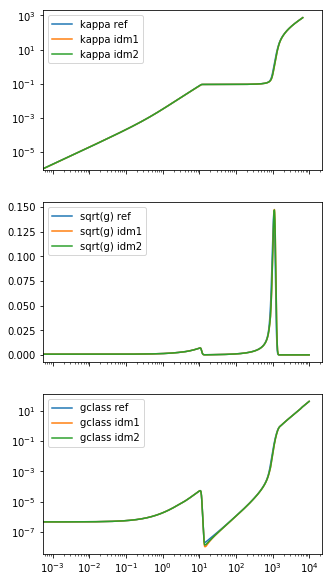

In [22]:
fig, axes = plt.subplots(3,1,figsize=(5,10),sharex=True)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    kappa = -np.log(Th['exp(-kappa)'])
    gclass = Th["kappa' [Mpc^-1]"]
    g = Th["kappa' [Mpc^-1]"]*Th['exp(-kappa)']
    axes[0].loglog(Th['z'],kappa, label = 'kappa ' + M)
    axes[1].semilogx(Th['z'],np.sqrt(g), label = 'sqrt(g) ' + M)
    axes[2].loglog(Th['z'],gclass, label = 'gclass ' + M)

for ax in axes:
    ax.legend()

(20, 2500.0)

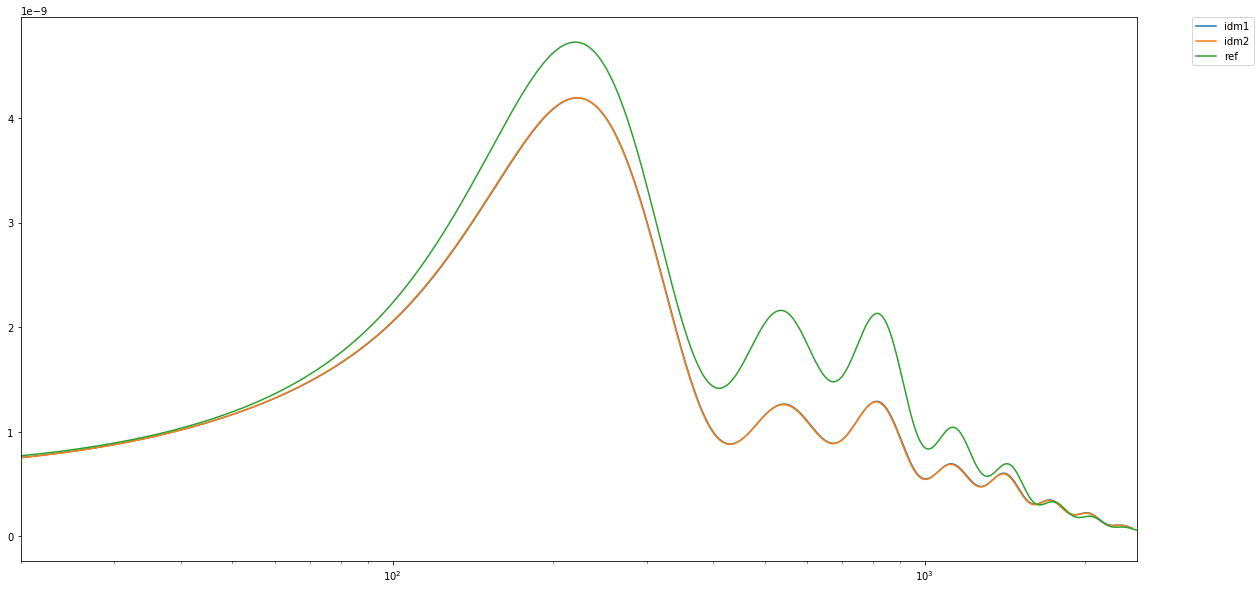

In [23]:
plt.figure(figsize = (20,10))
clref = cosmo['ref'].raw_cl(2500)
cl = cosmo['idm1'].raw_cl(2500)
cl2 = cosmo['idm2'].raw_cl(2500)
l = clref['ell']
lhack = l*0.98
TTref = clref['tt']
TT = cl['tt']
TT2 = cl2['tt']
plt.semilogx(lhack,(lhack*(lhack+1))*TT, label='idm1')
plt.semilogx(lhack,(lhack*(lhack+1))*TT2, label='idm2')
plt.semilogx(l,(l*(l+1))*TTref, label='ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(20,2.5e3)

(20, 2500.0)

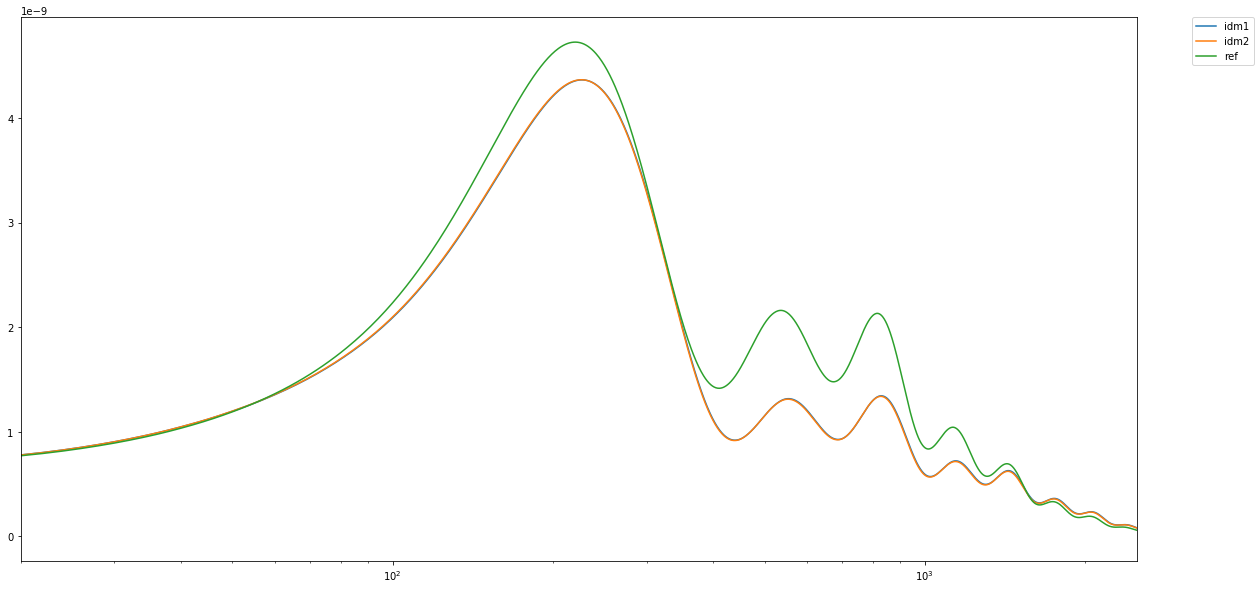

In [24]:
plt.figure(figsize = (20,10))
clref = cosmo['ref'].raw_cl(2500)
cl = cosmo['idm1'].raw_cl(2500)
cl2 = cosmo['idm2'].raw_cl(2500)
l = clref['ell']
TTref = clref['tt']
TT = cl['tt']
TT2 = cl2['tt']
plt.semilogx(l,(l*(l+1))*TT, label='idm1')
plt.semilogx(l,(l*(l+1))*TT2, label='idm2')
plt.semilogx(l,(l*(l+1))*TTref, label='ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(20,2.5e3)

In [11]:
TT1i = interp1d(lhack,TT)
TT2i = interp1d(lhack,TT2)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


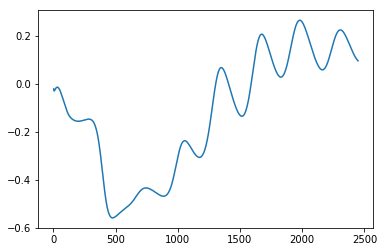

In [12]:
#l[0:2450]
#TT1i(l[0:2450])
plt.plot(l[0:2450],(TT1i(l[0:2450])-TTref[0:2450])/TTref[0:2450])
#plt.plot(l,(TT-TTref)/TTref)

In [13]:
def Vrms(z):
    if z > 1e3:
        return 1e-8
    else:
        return ((1+z)/1e3)**2 * 1e-8

In [14]:
V=np.zeros(Th['z'].shape)
for i in range(0,Th['z'].shape[0]):
    V[i] = Vrms(Th['z'][i])
    

(20, 10000.0)

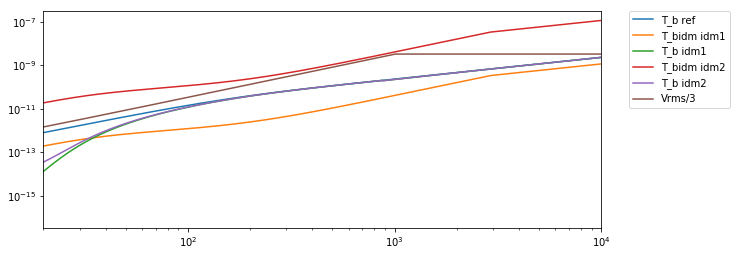

In [15]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        plt.loglog(Th['z'],Th['Tbidm [K]']*8.61733e-5/1e6,label='T_bidm '+M)
    plt.loglog(Th['z'],Th['Tb [K]']*8.61733e-5/1e9,label = 'T_b '+M)
plt.loglog(Th['z'],V/3, label = 'Vrms/3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(20,1e4)

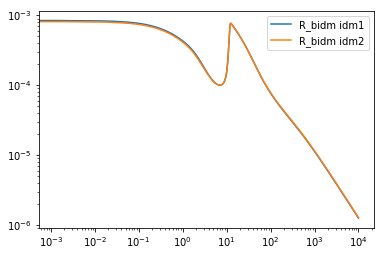

In [16]:
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(Th['z'],Th['Rbidm'],label='R_bidm '+M)
plt.legend()

In [17]:
plt.figure(figsize = (10,10))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    Vtherm=np.zeros(Th['z'].shape)
    Vrat=np.zeros(Th['z'].shape)
    #print(Th.keys())
    if M != 'ref':
        Vtherm +=Th['Tbidm [K]']*8.61733e-5/1e6
        Vtherm +=Th['Tb [K]']*8.61733e-5/1e9
        Vtherm +=V/3
        plt.loglog(Th['z'],Vtherm/(V/3),label='Vrel2/Vrms2 '+M)
plt.legend()

ValueError: operands could not be broadcast together with shapes (20512,) (20499,) (20512,) 

<Figure size 720x720 with 0 Axes>

(20, 2500.0)

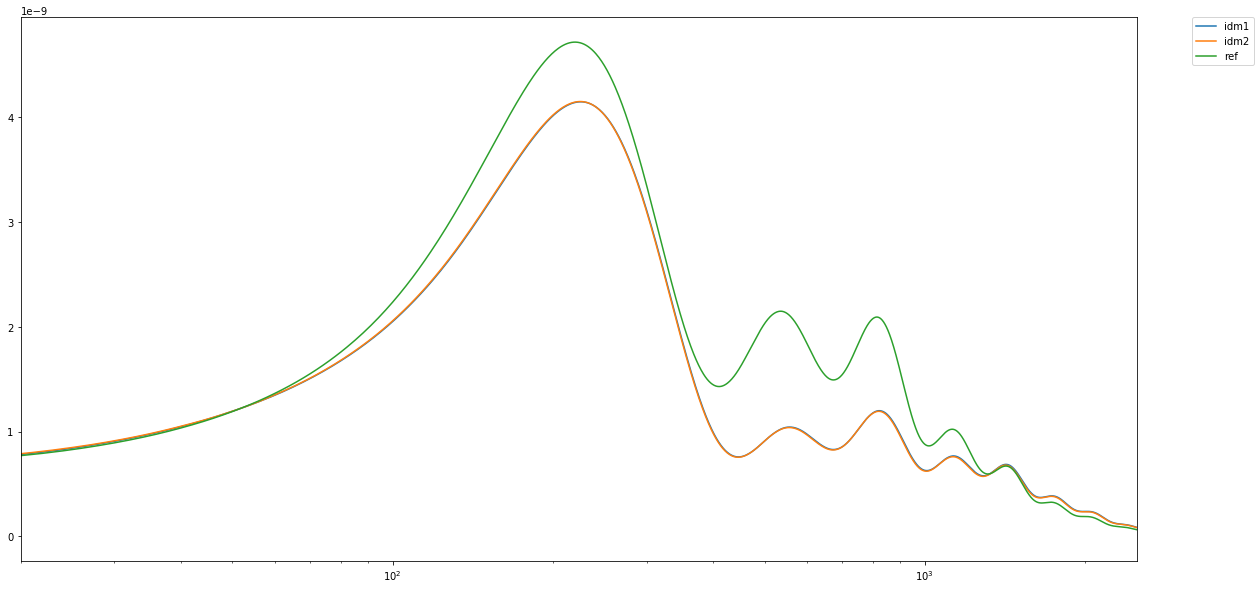

In [18]:
plt.figure(figsize = (20,10))
clref = cosmo['ref'].lensed_cl(2500)
cl = cosmo['idm1'].lensed_cl(2500)
cl2 = cosmo['idm2'].lensed_cl(2500)
l = clref['ell']
TTref = clref['tt']
TT = cl['tt']
TT2 = cl2['tt']
plt.semilogx(l,(l*(l+1))*TT, label='idm1')
plt.semilogx(l,(l*(l+1))*TT2, label='idm2')
plt.semilogx(l,(l*(l+1))*TTref, label='ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(20,2.5e3)

(20, 2500.0)

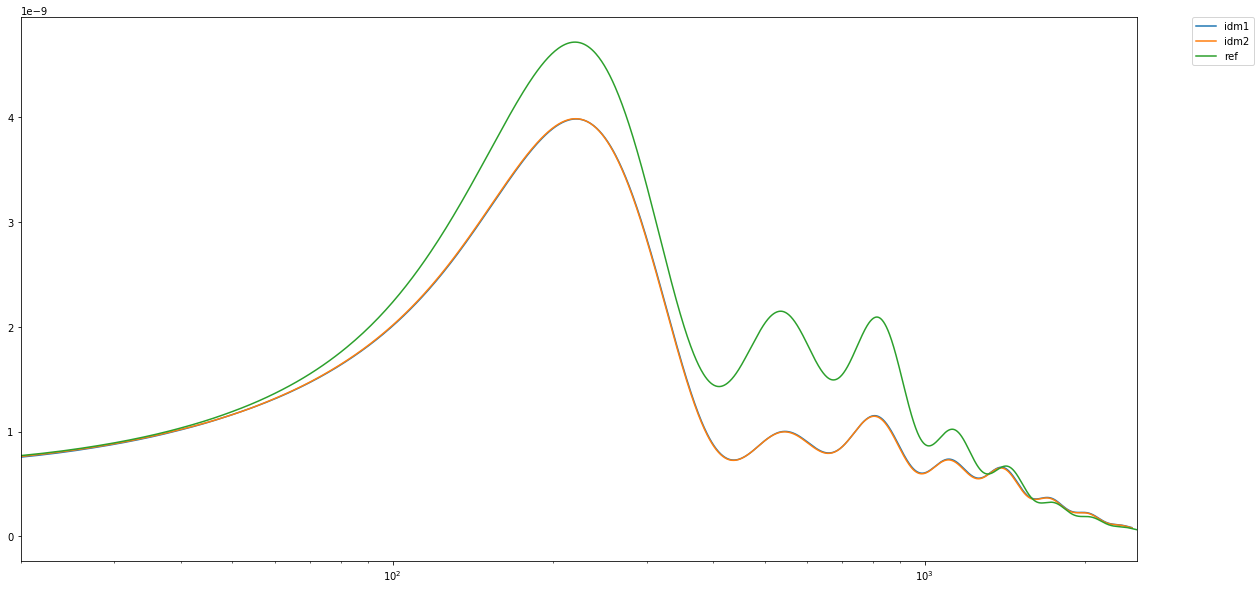

In [19]:
plt.figure(figsize = (20,10))
clref = cosmo['ref'].lensed_cl(2500)
cl = cosmo['idm1'].lensed_cl(2500)
cl2 = cosmo['idm2'].lensed_cl(2500)
l = clref['ell']
lhack = l*0.98
TTref = clref['tt']
TT = cl['tt']
TT2 = cl2['tt']
plt.semilogx(lhack,(lhack*(lhack+1))*TT, label='idm1')
plt.semilogx(lhack,(lhack*(lhack+1))*TT2, label='idm2')
plt.semilogx(l,(l*(l+1))*TTref, label='ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(20,2.5e3)

In [20]:
TT1i = interp1d(lhack,TT)
TT2i = interp1d(lhack,TT2)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


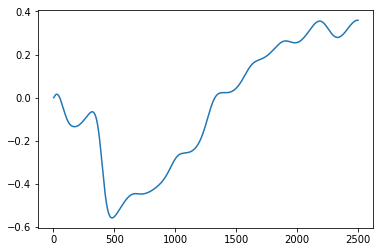

In [21]:
#l[0:2450]
#TT1i(l[0:2450])
#plt.plot(l[0:2450],(TT1i(l[0:2450])-TTref[0:2450])/TTref[0:2450])
plt.plot(l,(TT-TTref)/TTref)

array([0., 0., 0., ..., 0., 0., 0.])

NameError: name 'classy' is not defined